# Milestone 3: Investigate Project Questions

<hr style="clear:both">

Use this notebook for a quick start to the project. When a question is finished, extract it to multiple function callable from the website

**Project Mentor:** [Aoxiang Fan](https://people.epfl.ch/aoxiang.fan) ([Email](mailto:aoxiang.fan@epfl.ch))
**Authors:** [Luca Carroz](https://people.epfl.ch/emilie.carroz), [David Schroeter](https://people.epfl.ch/david.schroeter), [Xavier Ogay](https://people.epfl.ch/xavier.ogay), [Joris Monnet](https://people.epfl.ch/joris.monnet), [Paulo Ribeiro de Carvalho](https://people.epfl.ch/paulo.ribeirodecarvalho)

<hr style="clear:both">

## Import

In [76]:
# Import needed libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px


# Load autoreload extension
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## DataSet
Check that all data sets are already computed, if not please read `README.md` and follow steps for its creation.

In [77]:
folder_path = 'dataset/'
file_names = ['clean_enrich_movies.csv', 'spotify_composers_dataset.csv', 'mapping_locations_to_country.csv']
file_paths = [folder_path + file_name for file_name in file_names]
file_exist = [os.path.exists(file_path) for file_path in file_paths]

if all(file_exist):
    print(f"All files exist and are in the correct directory.")
else:
    print(
        f"At least one file doesn't exist. Please be sure to have the files and to locate them in the right directory (dataset/).")

All files exist and are in the correct directory.


## Load Data

Section to load the enriched and retrieved data.

In [78]:
spotify_composers_dataset = pd.read_pickle('dataset/spotify_composers_dataset.pickle')
clean_enrich_movies = pd.read_pickle('dataset/clean_enrich_movies.pickle')
location_to_country = pd.read_csv('dataset/mapping_locations_to_country.csv')

# display(clean_enrich_movies)

## Question 1

Which are the most frequent music genre appearing in movies ?

In [79]:
from question_script.question1 import *

# Retrieve composer name out of the composer class to easily join spotify and movie dataframes
composers_to_movies = create_db_to_link_composers_to_movies(clean_enrich_movies)

In [80]:
# TODO: Discuss about a possible interactive graph. The user can choose the range of box office revenue of movies and see the ranking with genre. GOAL: See if low, middle or high box office revenue have same ranking in music genre or not.

# Join spotify and movie dataset and choose the relevant attributes for question 1
movie_music_genre_df = pd.merge(left=spotify_composers_dataset,
                                right=composers_to_movies,
                                left_on='name',
                                right_on='composer_name',
                                how='inner')[['movie_name', 'genres', 'movie_revenue']]

question_1(movie_music_genre_df=movie_music_genre_df,
           min_revenue=0,
           max_revenue=int(1e12),
           soundtrack_in_genre=False)

,genre,count
16,filmi,119
207,scorecore,112
17,modern bollywood,107
209,movie tunes,97
92,singer-songwriter,95
...,...,...
48,ye ye,1
358,irish classical,1
357,celtic harp,1
356,women's music,1


## Question 2

What is the average composer's age at their :
   - first movie appearance ?
   - biggest box office revenue ?

### Average composer's age at their first movie appearance

In [81]:
from question_script.question2 import *

composer_dataframe_with_fst_appearance = calculate_composer_age_fst_appearance(clean_enrich_movies)

composer_fst_appearance_days, composer_fst_appearance_years = get_average_age_first_appearance(composer_dataframe_with_fst_appearance)

print("The average age of the composer at his first movie is:\n"
      f"\t- {composer_fst_appearance_years:.3f} years\n"
      f"\t- {composer_fst_appearance_days:.3f} days")

The average age of the composer at his first movie is:
	- 34.198 years
	- 12490.663 days


C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



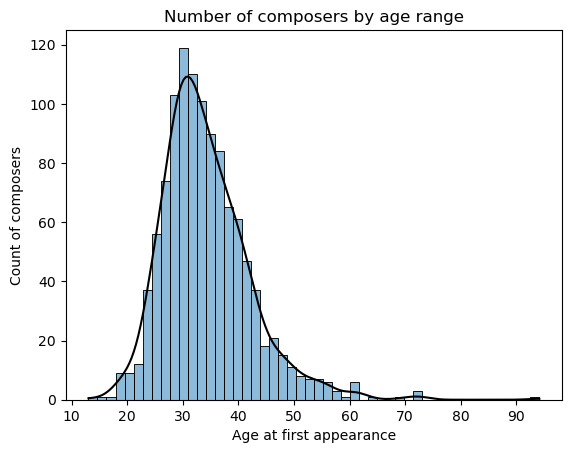

In [82]:
plot_composer_by_age_range(composer_dataframe_with_fst_appearance, 'c_age_first_appearance_years', bin_nb=50)

### Average composer's age at their biggest box office revenue

In [83]:
composer_age_highest_box_office = calculate_composer_age_highest_box_office(clean_enrich_movies)

composer_age_high_box_office_days, composer_age_high_box_office_years = get_average_age_high_box_office(composer_age_highest_box_office)

print("The average age of the composer at his highest box office revenue is:\n"
      f"\t- {composer_age_high_box_office_years:.3f} years\n"
      f"\t- {composer_age_high_box_office_days:.3f} days")

The average age of the composer at his highest box office revenue is:
	- 41.891 years
	- 15300.559 days


C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



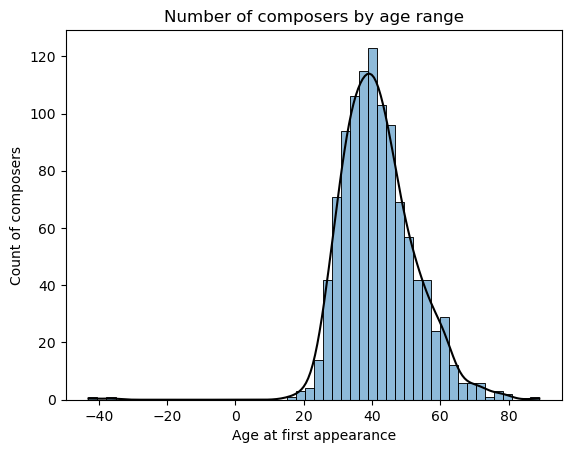

In [84]:
plot_composer_by_age_range(composer_age_highest_box_office, 'c_age_highest_revenue_years', bin_nb=50)

## Question 3

How the top composers' career progress over the years ?

In [85]:
from question_script.question3 import *

movie_renamed = prepare_data_for_q3()

display(movie_renamed.head())
print(movie_renamed.shape)

,release_date,composers,box_office_revenue
0,2009,"[Composer(id=1729, name='James Horner', birthd...",2.782275e+09
1,1997,"[Composer(id=1729, name='James Horner', birthd...",2.185372e+09
2,2012,"[Composer(id=37, name='Alan Silvestri', birthd...",1.511758e+09
3,2011,"[Composer(id=2949, name='Alexandre Desplat', b...",1.328111e+09
4,2013,"[Composer(id=6041, name='Brian Tyler', birthda...",1.215577e+09


(7424, 3)


,release_year,composer,box_office_revenue
0,2009,"Composer(id=1729, name='James Horner', birthda...",2.782275e+09
1,1997,"Composer(id=1729, name='James Horner', birthda...",2.185372e+09
2,2012,"Composer(id=37, name='Alan Silvestri', birthda...",1.511758e+09
3,2011,"Composer(id=2949, name='Alexandre Desplat', bi...",1.328111e+09
4,2013,"Composer(id=6041, name='Brian Tyler', birthday...",1.215577e+09


(8505, 3)


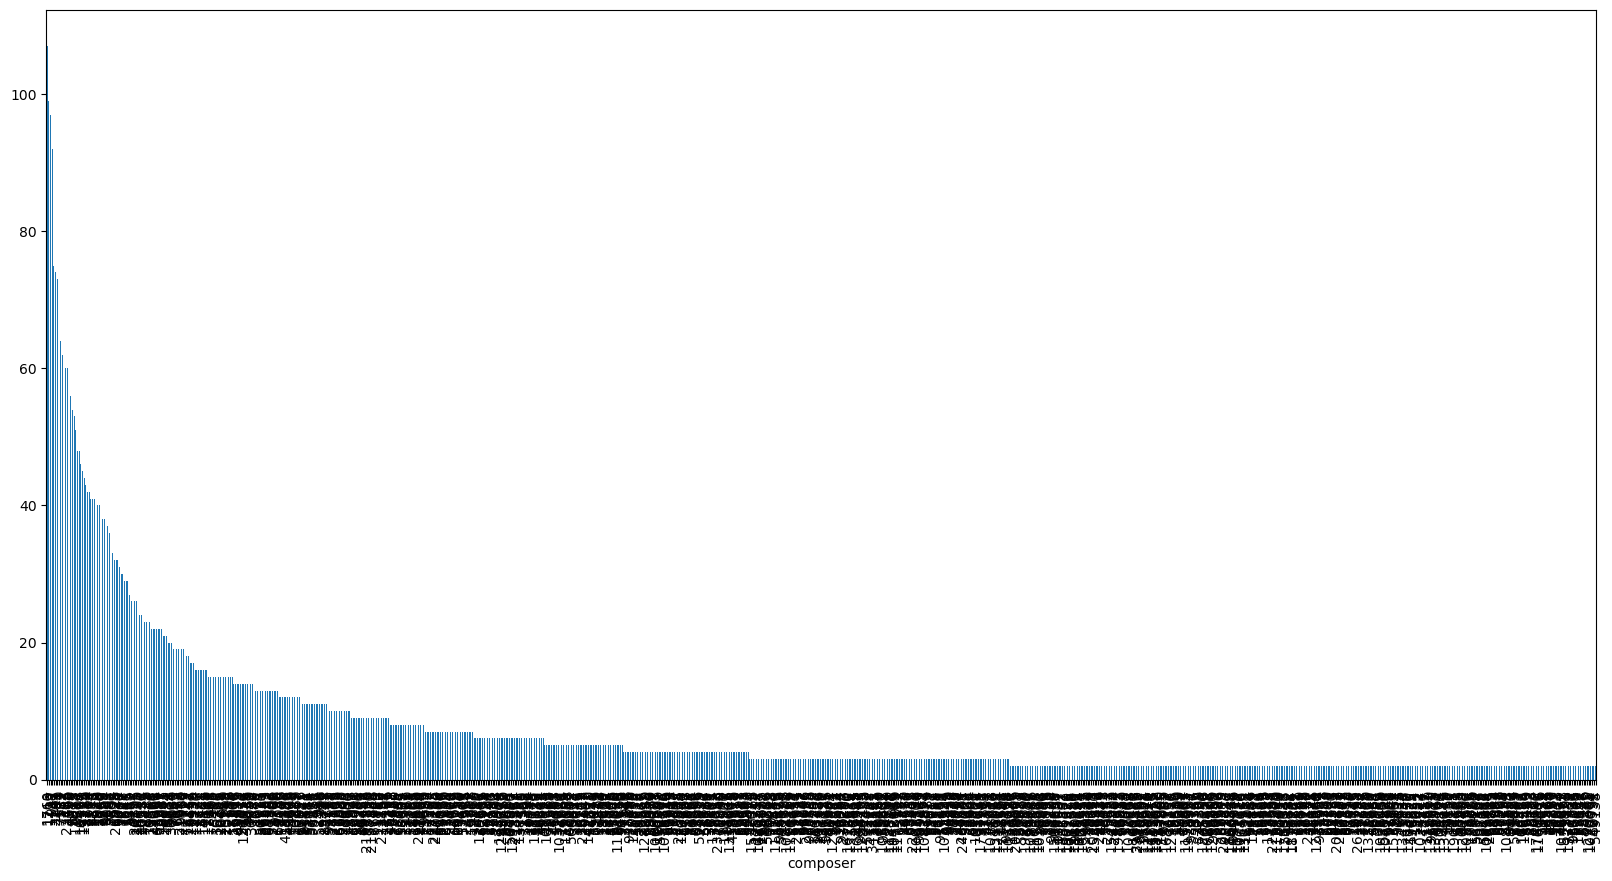

In [86]:
movie_grouped_by_composer = group_by_composer_id(movie_renamed)

# Don't show the composer with only one movie
movie_grouped_by_composer = movie_grouped_by_composer.filter(lambda x: len(x) > 1)

# Plot the number of movies per composer
movie_grouped_by_composer['composer'].value_counts().plot(kind='bar', figsize=(20, 10))
plt.show()

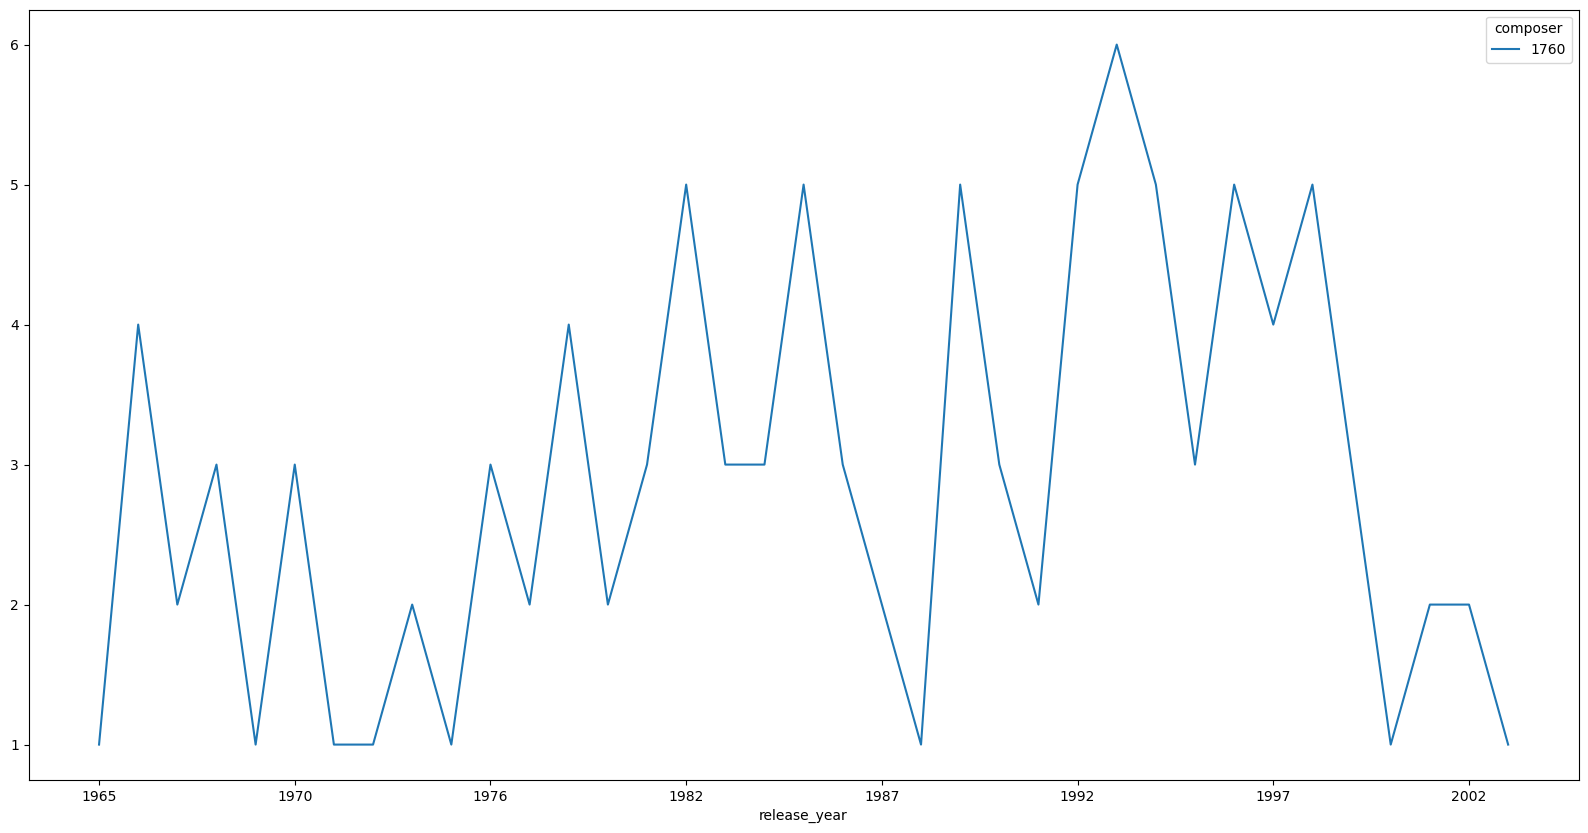

In [87]:
movie_grouped_by_top_composer = filter_by_top_composers(movie_grouped_by_composer, 1)

# Plot the evolution of the number of movies per year for the top 25 composers
movie_grouped_by_composer_and_year = movie_grouped_by_top_composer.groupby(['composer', 'release_year'])
movie_grouped_by_composer_and_year['composer'].value_counts().unstack(0).plot(figsize=(20, 10))
plt.show()

<Axes: xlabel='release_year'>

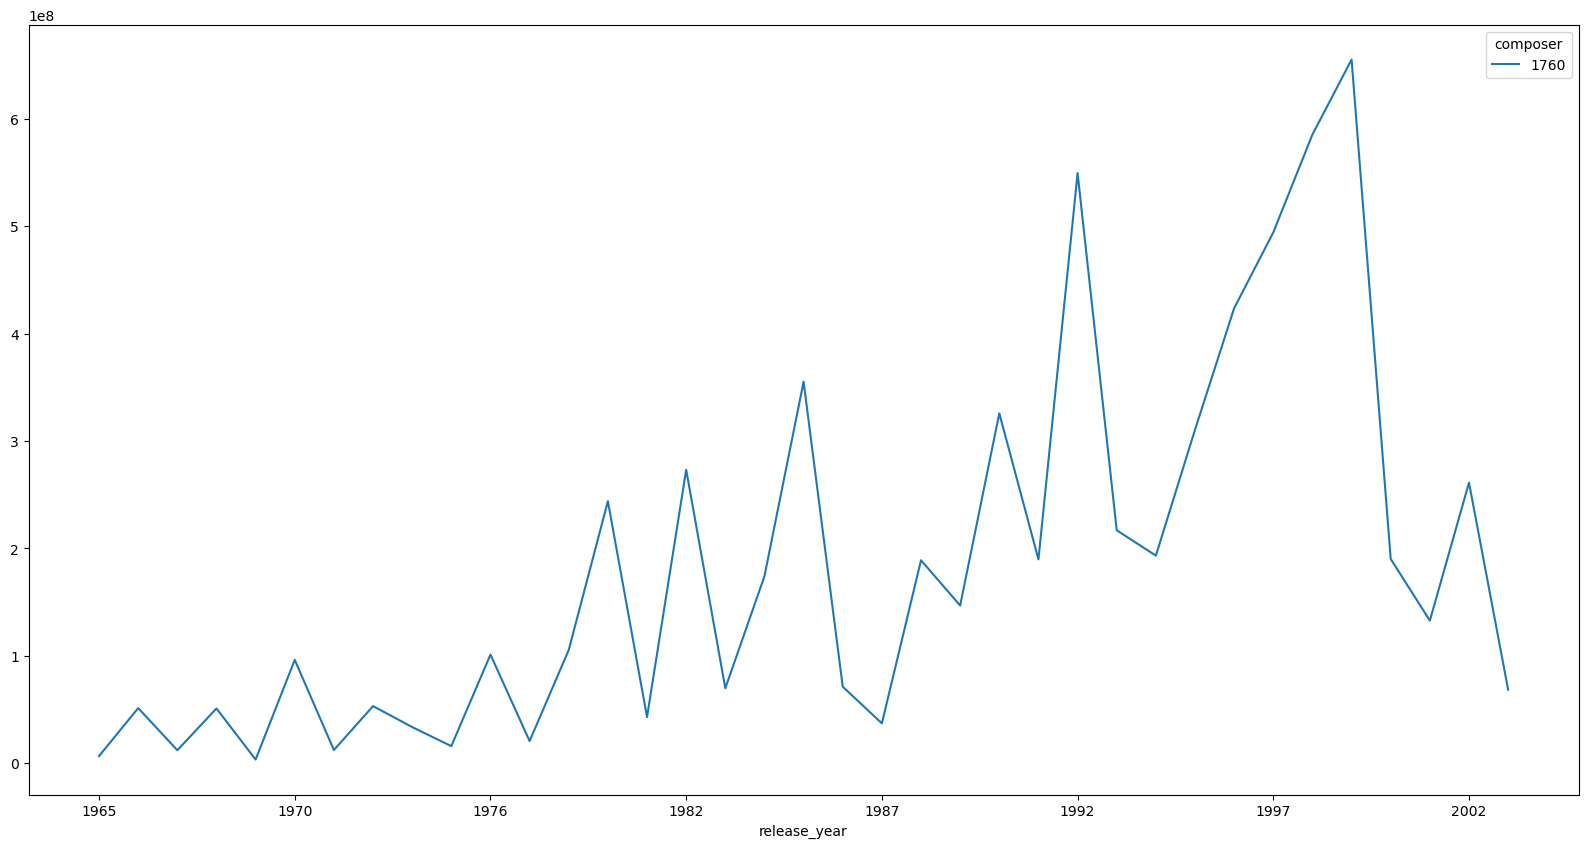

In [88]:
# Plot the evolution of the revenue for the film per year for the top composers
movie_grouped_by_composer_and_year['box_office_revenue'].sum().unstack(0).plot(figsize=(20, 10))

## Question 4

Where do composers come from ?

In [89]:
from question_script.question4 import *

# Use the already computed dataframe from q.1 to retrieve information like the place_of_birth of all composers
composer_place_of_birth_df = pd.merge(
    left=spotify_composers_dataset,
    right=composers_to_movies,
    left_on='name',
    right_on='composer_name',
    how='inner'
)[['composer_name', 'composer_place_of_birth', 'popularity']].drop_duplicates()  # note: few rows were duplicate

# Delete rows (composers) where we do not have the place of birth (i.e. None value)
composer_place_of_birth_df = composer_place_of_birth_df.query('composer_place_of_birth.notna()')

# Compute the number of composer per location within the selected range of composer's popularity
number_composer_per_location = composers_selection_over_popularity(
    df=composer_place_of_birth_df,
    min_popularity=0,
    max_popularity=100
).groupby('composer_place_of_birth').count()["composer_name"]

# For plot reasons, map all locations to its corresponding country and count again the number of composer
number_composer_per_country = pd.merge(
    left=number_composer_per_location,
    right=location_to_country,
    left_on='composer_place_of_birth',
    right_on='location',
    how='outer'
).groupby('country').count()["location"]

[link](https://plotly.com/python/builtin-colorscales/) to see different colors.

In [90]:
heat_map_world(df=number_composer_per_country.reset_index(),
               color='peach')

## Question 5

Does composer's gender matter ?

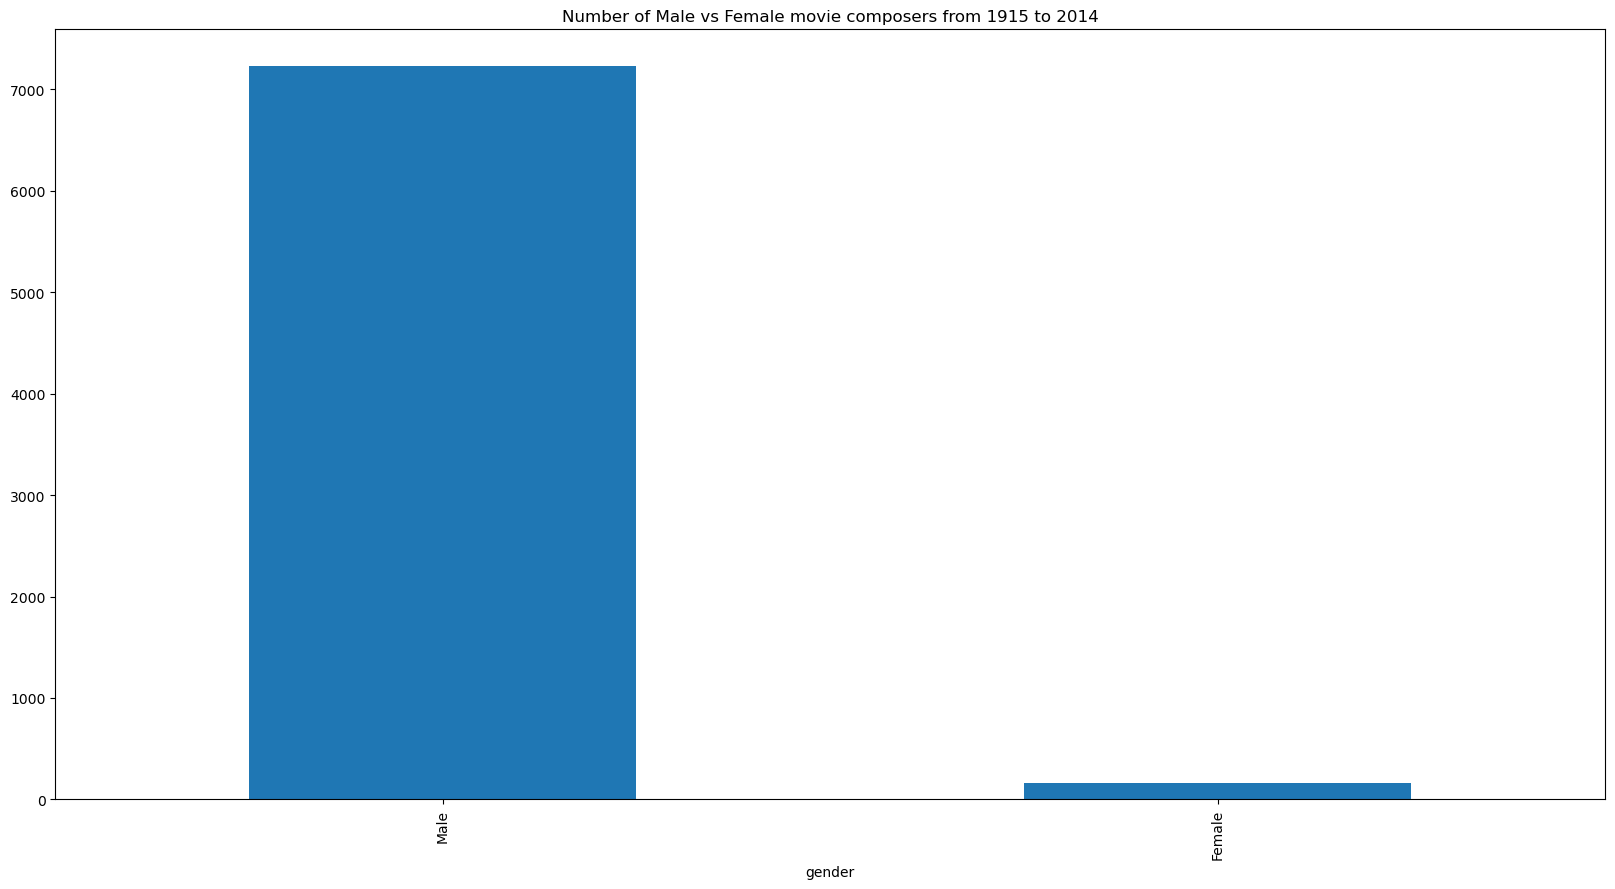

In [91]:
from question_script.question5 import *

# Get all movie composers
composers = get_cleaned_composers()
# Plot the number of Male vs Female movie composers
composers['gender'].value_counts().plot(kind='bar', figsize=(20, 10),
                                        title="Number of Male vs Female movie composers from 1915 to 2014")
plt.show()

Let's see how this ratio evolved over the years

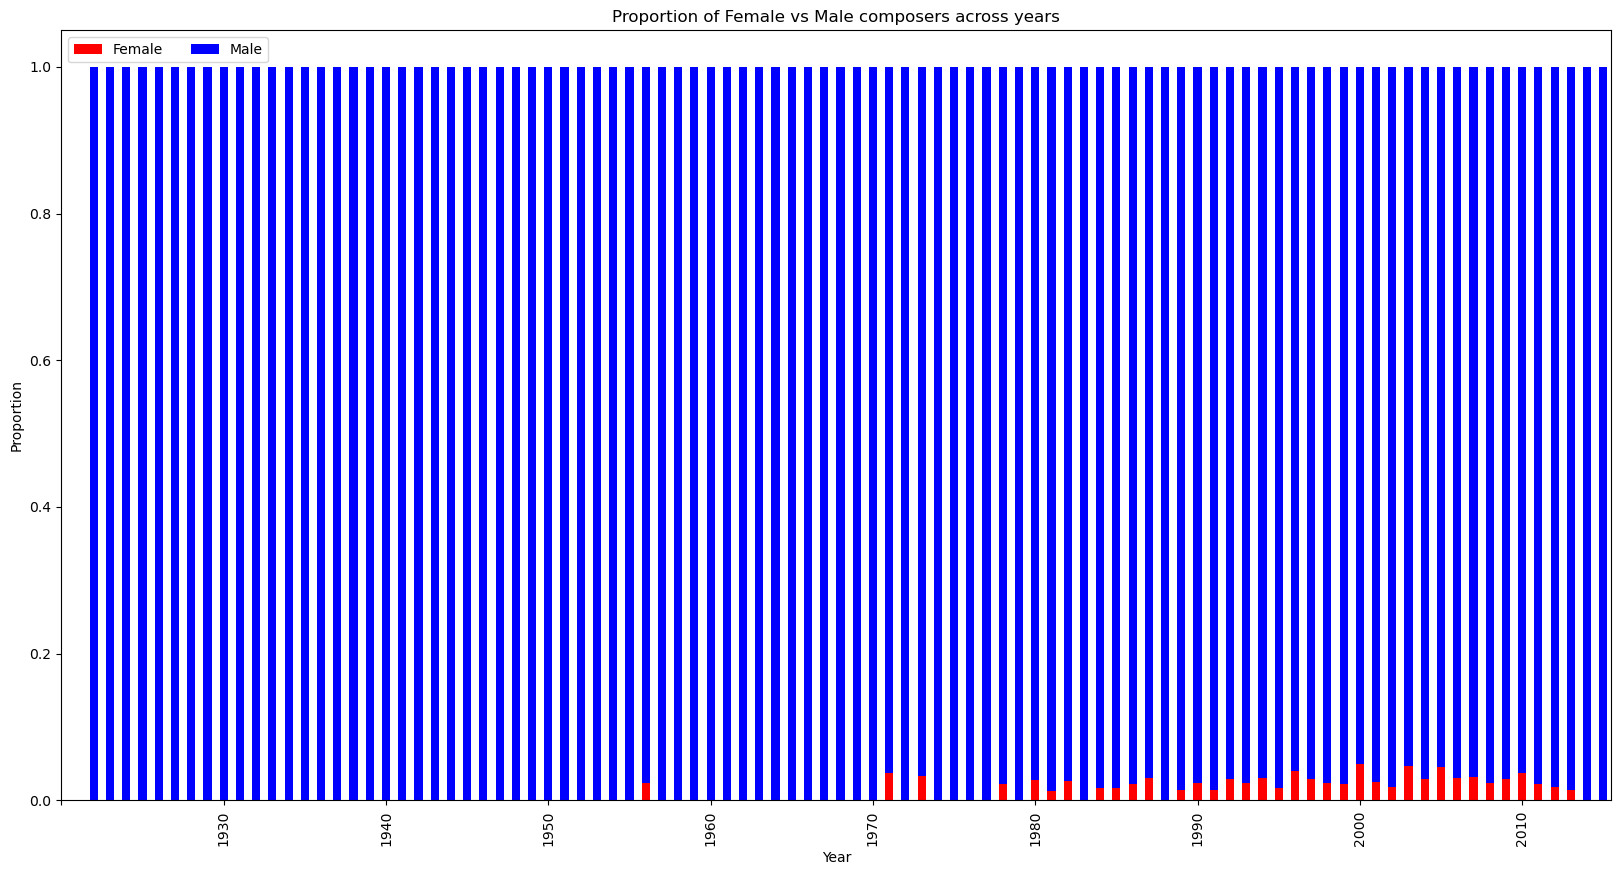

In [92]:
# Dataframe containing the number of composers for each year, grouped by their gender
gender_prop_by_year = pd.crosstab(index=composers['release_date'], columns=composers['gender'], normalize='index')
# Plot the dataframe
gender_prop_by_year.plot(kind='bar', stacked=True, color=['red', 'blue'], figsize=(20, 10))
plt.xticks(np.arange(-2, 96, 10))
plt.title('Proportion of Female vs Male composers across years')
plt.legend(loc="upper left", ncol=2)
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.show()

## Question 6

Does having a personal website correlate with the composers' success ?

<Axes: title={'center': 'popularity'}, xlabel='has_homepage'>

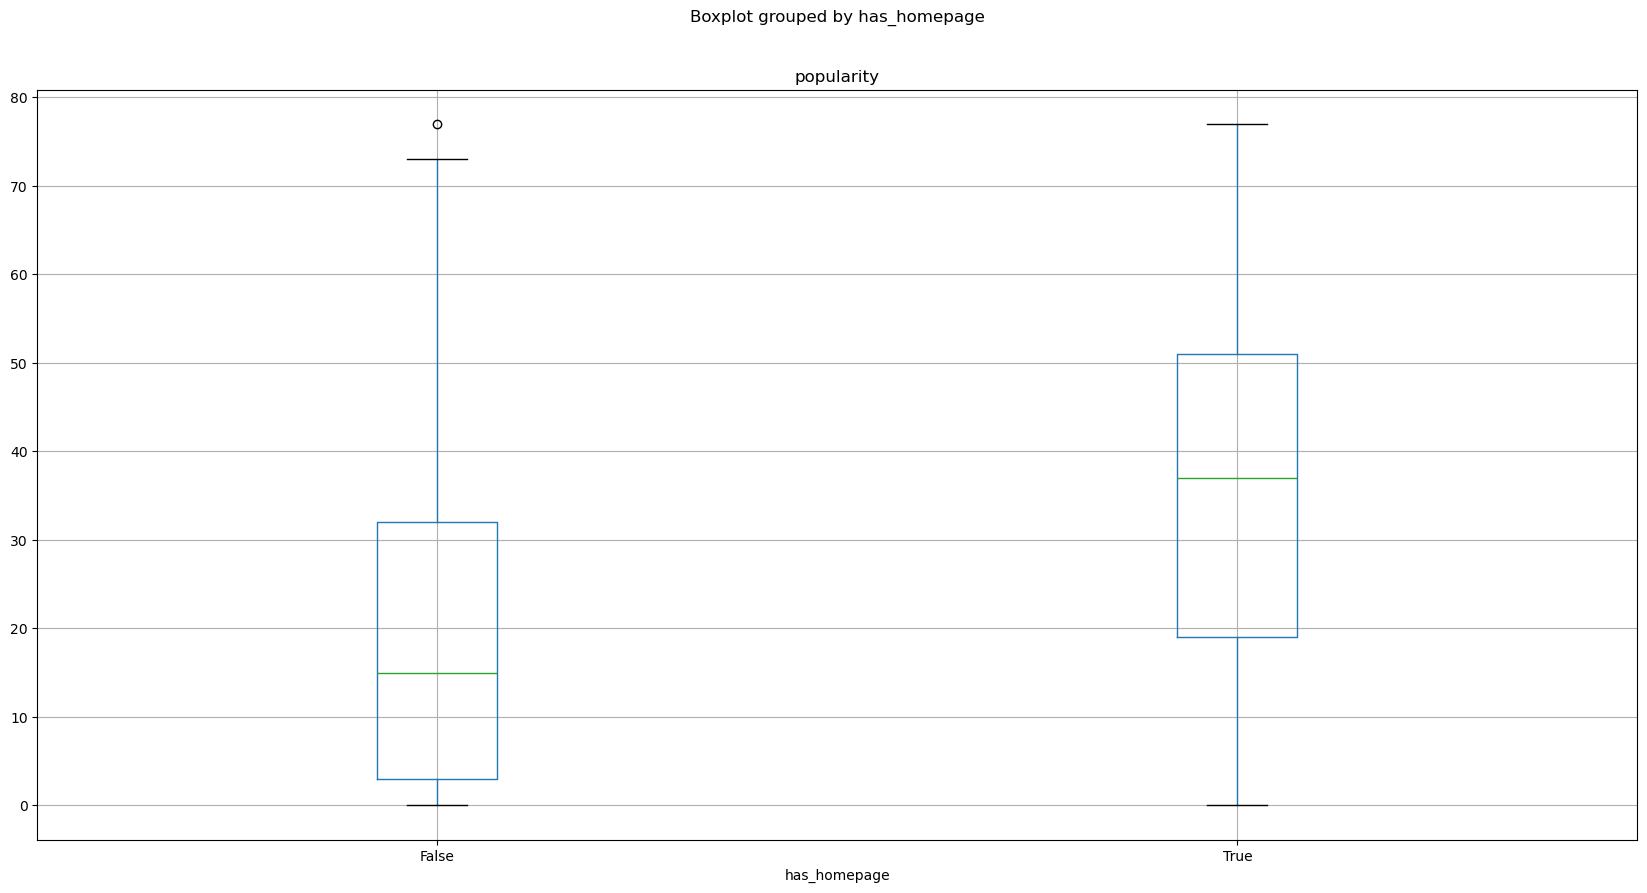

In [93]:
from question_script.question6 import *

a = get_composer_success_and_website()
a.boxplot(column='popularity', by='has_homepage', figsize=(20, 10))

## Question 7

Is there a correlation between box office revenue and movie's playlist popularity ?

In [94]:
df = pd.read_pickle('dataset/album_id_and_musics.pickle')
df1 = pd.read_pickle("dataset/movie_album_and_revenue.pickle")

In [95]:
df1 = df1[~df1["album_id"].isna()]
print(len(df1))
df1.drop_duplicates(subset=['movie_name'], inplace=True)

2206


In [96]:
print(len(df1))
#df1 = df1[df1["movie_revenue"] > 1e8]

1929


In [97]:
empty = df["track"].isna()
df = df[~empty]
df.reset_index(inplace=True)
df["popularity"] = df["track"].apply(lambda x: x.popularity)

In [98]:
df

,index,album_id,track_ids,track,popularity
0,1,6C4Sjqz7fHXH5RtNYs0ADN,2XlDAEAe4gTPQ8lLyO3Pox,"Music(id='2XlDAEAe4gTPQ8lLyO3Pox', name='The Y...",2
1,1,6C4Sjqz7fHXH5RtNYs0ADN,0vObpK5iEwMDgWAOk5Mq9V,"Music(id='0vObpK5iEwMDgWAOk5Mq9V', name='Elois...",1
2,1,6C4Sjqz7fHXH5RtNYs0ADN,7e6DauQ0LdF0iEEIj8HiWM,"Music(id='7e6DauQ0LdF0iEEIj8HiWM', name='Forge...",7
3,1,6C4Sjqz7fHXH5RtNYs0ADN,1T9IFBmJEGIrTVDTgEhQc4,"Music(id='1T9IFBmJEGIrTVDTgEhQc4', name='Mae',...",1
4,1,6C4Sjqz7fHXH5RtNYs0ADN,7uXPHrqxYCxjKZ1zOHrbbH,"Music(id='7uXPHrqxYCxjKZ1zOHrbbH', name='Pisa'...",1
...,...,...,...,...,...
29005,7688,5GEMDzzKJzVJkwRiPYPzn4,09X4zlURjTYV0FOt8BpFP1,"Music(id='09X4zlURjTYV0FOt8BpFP1', name='Kidna...",18
29006,7688,5GEMDzzKJzVJkwRiPYPzn4,5BBCrZd2wF0oa9A8Xaqbys,"Music(id='5BBCrZd2wF0oa9A8Xaqbys', name=""You'v...",24
29007,7688,5GEMDzzKJzVJkwRiPYPzn4,5XA4792R9YrEF4jOEAlO2Y,"Music(id='5XA4792R9YrEF4jOEAlO2Y', name='Downs...",23
29008,7688,5GEMDzzKJzVJkwRiPYPzn4,55TOuVYvD7IMn88rhfT0K4,"Music(id='55TOuVYvD7IMn88rhfT0K4', name='Round...",16


In [99]:
pop_df = df[['album_id','popularity']].groupby('album_id').mean()
pop_df = pop_df[~pop_df["popularity"].isna()]

pop_df.reset_index(inplace=True)
pop_df

,album_id,popularity
0,009d83fu2guwouIwqr7i9E,28.214286
1,014xsQeC6vBSQkTiodIXVI,17.375000
2,01OGZsn8wYY7EMMqzDAcir,14.052632
3,01Yh4sNgK27xl6yoy70iqA,5.214286
4,01dyT7chl9u1kqGVO9NJ89,15.083333
...,...,...
1889,7z8Z5c3QGEwshWD1gJ2FuG,17.571429
1890,7zdZNXoapFcOW663zgLdOE,37.750000
1891,7zgCMWwWjurZjOQjuGyokE,1.550000
1892,7zmd0vng4c2uLobETbruWw,21.210526


In [100]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots()
fig.add_trace(go.Histogram(x=pop_df['popularity'], nbinsx=5))

# Update layout with slider
fig.update_layout(
    sliders=[
        {
            'pad': {"t": 60},
            'currentvalue': {"prefix": "Number of Bins: "},
            'steps': [{'method': 'restyle', 'label': str(i), 'args': [{'nbinsx': i}]} for i in range(5, 16, 5)]
        }
    ]
)

# Update axes and layout
fig.update_xaxes(title_text='Popularity')
fig.update_yaxes(title_text='Count')
fig.update_layout(title_text='Interactive Histogram of Popularity')

# Show the plot
fig.show()

In [101]:
merged_df = pd.merge(left=df1, right=pop_df, left_on='album_id', right_on='album_id', how='inner')
merged_df

,movie_name,release_date,movie_revenue,composer_name,album_id,popularity
0,The Yellow Rolls-Royce,1964,5400000.0,Riz Ortolani,6C4Sjqz7fHXH5RtNYs0ADN,1.384615
1,The Twilight Saga: Breaking Dawn - Part 1,2011,705058657.0,Carter Burwell,1iGIqDBXm5HpTqHCvdc4QP,41.222222
2,Twilight,2008,392616625.0,Carter Burwell,2PDlvc7K51qC4Bkali3q0R,39.933333
3,New Moon,2009,709827462.0,Alexandre Desplat,2PDlvc7K51qC4Bkali3q0R,39.933333
4,The Blind Side,2009,309208309.0,Carter Burwell,1zM06ZeODLZp2Ojka6lUTf,4.950000
...,...,...,...,...,...,...
1910,Trespass,1992,13747138.0,Ry Cooder,4OAL9ioMl5pFXQo0FbEjj7,0.666667
1911,MacGruber,2010,9322895.0,Matthew Compton,0ZacOBwzregRuuOf6Bn7Zp,6.388889
1912,A Serbian Film,2010,1541.0,Sky Wikluh,62KtGcUD09g6YksUzzKYO9,4.600000
1913,The Spiral Staircase,1946,2800000.0,Roy Webb,5M4zXe3uklRZplToNWqjGi,0.000000


In [102]:
import plotly.express as px
fig = px.scatter(merged_df, x="popularity", y="movie_revenue", color='release_date', trendline="ols")
fig.show()

C:\Users\xagao\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning:

divide by zero encountered in scalar divide



In [103]:
import plotly.express as px
fig = px.scatter(merged_df, x="popularity", y="movie_revenue", trendline="ols")
fig.show()

In [104]:
#Perform a pearson correlation

from scipy.stats import pearsonr
corr, _ = pearsonr(merged_df["popularity"], merged_df["movie_revenue"])

print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.392


In [105]:
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'])

# Extract the year from the 'release_date'
merged_df['year'] = merged_df['release_date'].dt.year

# Group by year and calculate the correlation between 'movie_revenue' and 'popularity'
correlation_by_year = merged_df.groupby('year')[['movie_revenue', 'popularity']].corr().iloc[0::2,-1].reset_index()

# Rename the columns for the heatmap
correlation_by_year.columns = ['year', 'drop', 'correlation']
correlation_by_year = correlation_by_year.drop(columns='drop')
correlation_by_year.dropna(inplace=True)
correlation_by_year = correlation_by_year[correlation_by_year["correlation"] < 0.99]
correlation_by_year = correlation_by_year[correlation_by_year["correlation"] > -0.99]

display(correlation_by_year)

# Create the heatmap
fig = px.imshow(correlation_by_year.pivot(index='year', columns='correlation', values='correlation'),
                labels=dict(x="Correlation", y="Year", color="Correlation"),
                y=correlation_by_year['year'],
                aspect="auto",
                title="Heatmap of Correlation Between Movie Revenue and Popularity by Year")

# Update xaxis because there is only one correlation value per year
fig.update_xaxes(side="top")

fig.show()

,year,correlation
15,1959,0.477916
17,1961,0.205819
18,1962,-0.192297
19,1963,0.298659
21,1965,0.520476
22,1966,-0.076513
23,1967,0.777949
24,1968,0.792902
26,1970,0.680985
27,1971,-0.470170
